In [111]:
# 导入相关数据包
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from scipy import stats
from scipy.stats import norm

In [112]:
#导入数据
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [113]:
#特征说明
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [114]:
train_corr = train.drop('Id',axis=1).corr()
train_corr

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.386347 -0.139781     0.032628    -0.059316   
LotFrontage     -0.386347     1.000000  0.426095     0.251646    -0.059213   
LotArea         -0.139781     0.426095  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.251646  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.059213 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.123349  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.088866  0.013788     0.550684     0.073741   
MasVnrArea       0.022936     0.193458  0.104160     0.411876    -0.128101   
BsmtFinSF1      -0.069836     0.233633  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.049900  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.132644 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.392075  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.457181  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.080177  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.038469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.402797  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.100949  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.007234  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.198769  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.053532  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.263170  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.006069 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.352096  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.266639  0.271364     0.396765    -0.023820   
GarageYrBlt      0.085072     0.070250 -0.024947     0.547766    -0.324297   
GarageCars      -0.040110     0.285691  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.344997  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.088521  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.151972  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010700 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.070029  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.041383  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.206167  0.077672     0.065166    -0.001985   
MiscVal         -0.007683     0.003368  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.011200  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.007450 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.351799  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.022936   -0.069836   -0.065649   
LotFrontage     0.123349      0.088866    0.193458    0.233633    0.049900   
LotArea         0.014228      0.013788    0.104160    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.411876    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.128101   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.315707    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.179618    0.128451   -0.067759   
MasVnrArea      0.315707      0.179618    1.000000    0.264736   -0.072319   
BsmtFinSF1      0.249503      0.128451    0.264736    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.072319   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.114442   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.363936    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

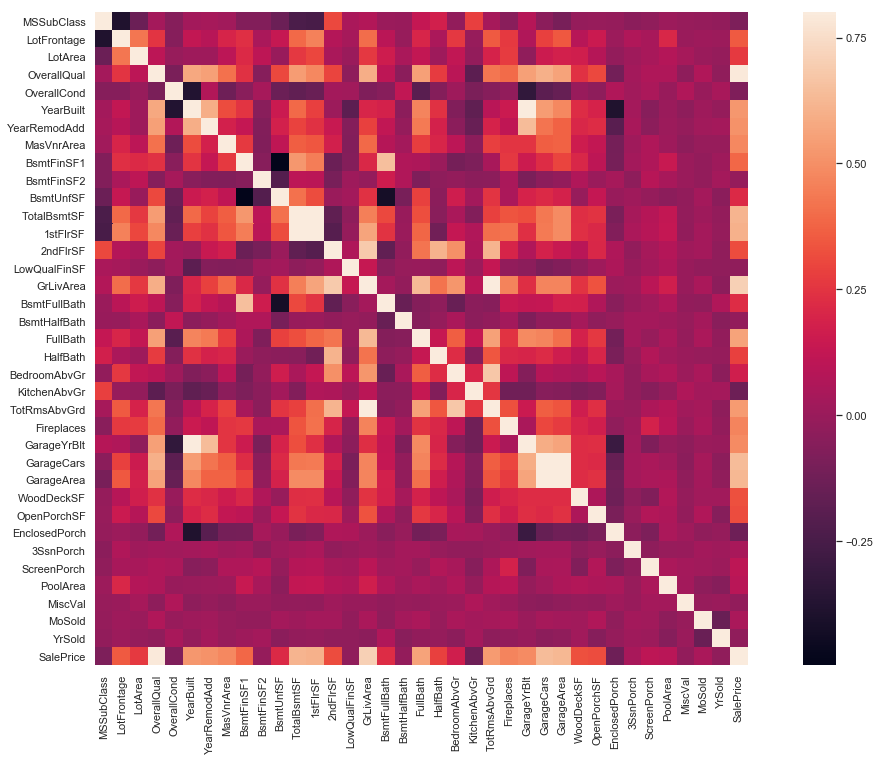

In [115]:
# 画出相关性热力图
a = plt.subplots(figsize=(20, 12))#调整画布大小
a = sns.heatmap(train_corr, vmax=.8, square=True)#画热力图   annot=True 显示系数

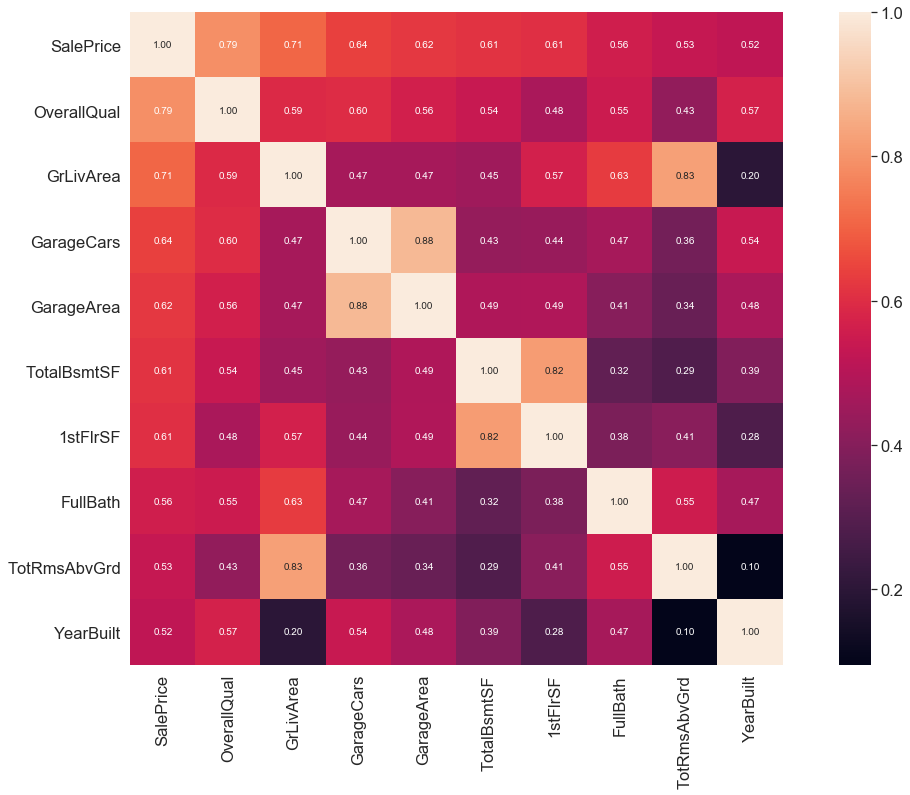

'\n1. GarageCars 和 GarageAre 相关性很高、就像双胞胎一样，所以我们只需要其中的一个变量，例如：GarageCars。\n2. TotalBsmtSF  和 1stFloor 与上述情况相同，我们选择 TotalBsmtS\n3. GarageAre 和 TotRmsAbvGrd 与上述情况相同，我们选择 GarageAre\n'

In [116]:
#SalePrice 相关度特征排序

# 寻找K个最相关的特征信息
k = 10 # number of variables for heatmap
cols = train_corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.5)
hm = plt.subplots(figsize=(20, 12))#调整画布大小
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

'''
1. GarageCars 和 GarageAre 相关性很高、就像双胞胎一样，所以我们只需要其中的一个变量，例如：GarageCars。
2. TotalBsmtSF  和 1stFloor 与上述情况相同，我们选择 TotalBsmtS
3. GarageAre 和 TotRmsAbvGrd 与上述情况相同，我们选择 GarageAre
''' 

c:\python36\install\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


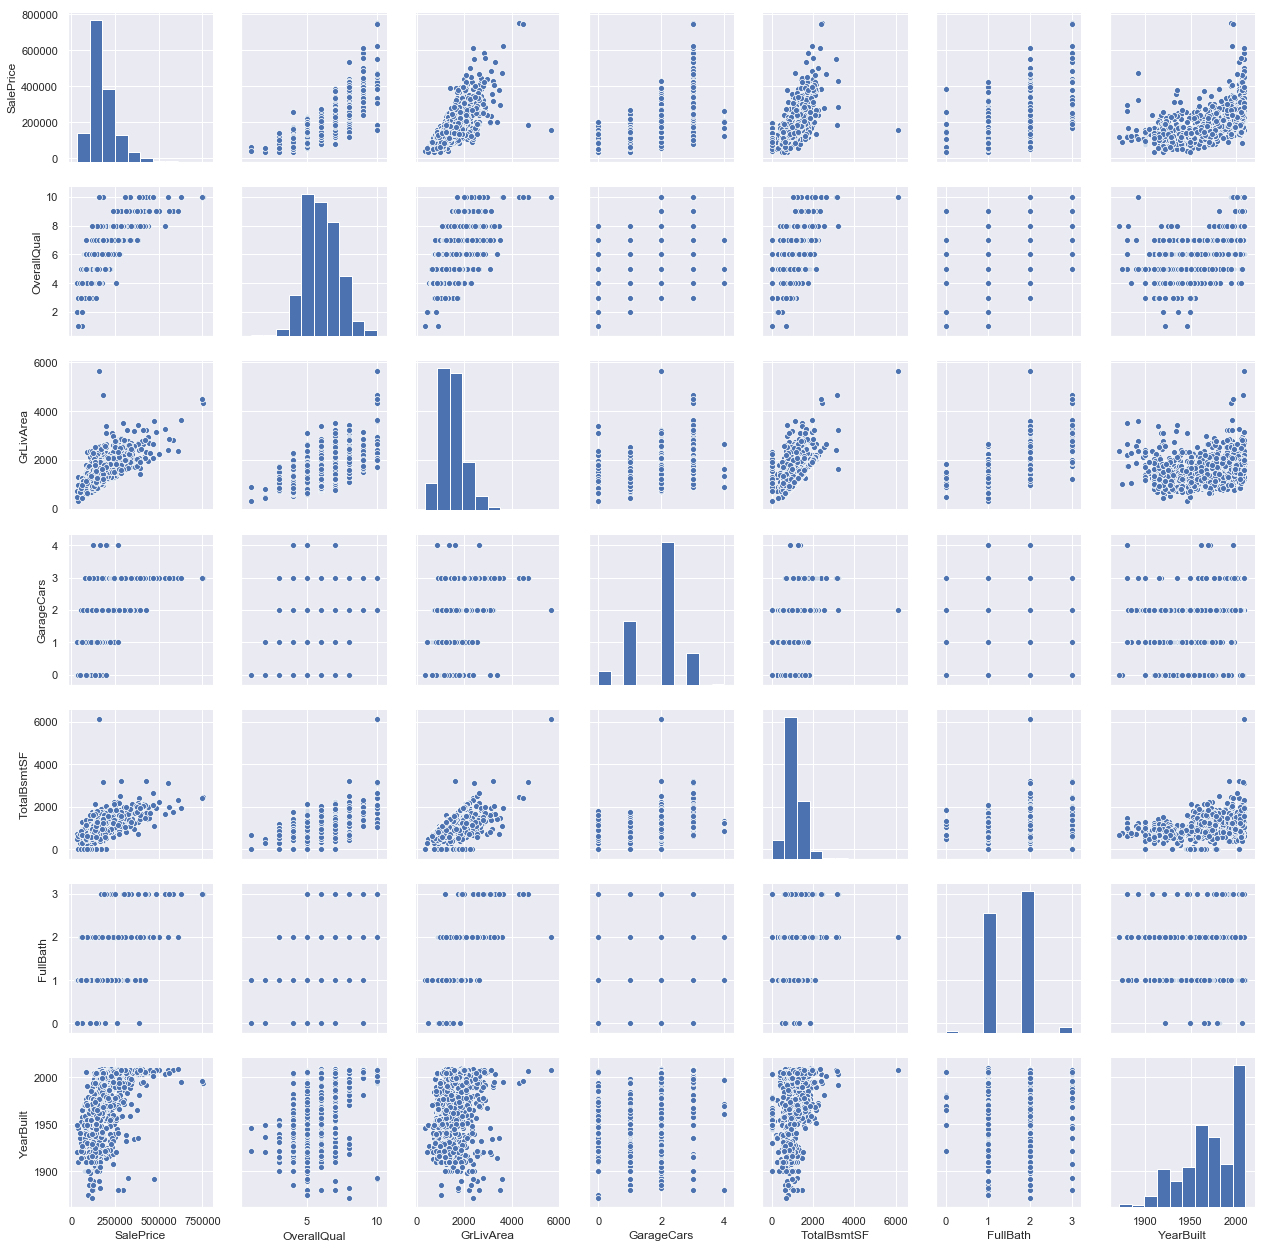

In [117]:
#SalePrice 和相关变量之间的散点图
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show()

In [118]:
train[['SalePrice', 'OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
SalePrice      1460 non-null int64
OverallQual    1460 non-null int64
GrLivArea      1460 non-null int64
GarageCars     1460 non-null int64
TotalBsmtSF    1460 non-null int64
FullBath       1460 non-null int64
YearBuilt      1460 non-null int64
dtypes: int64(7)
memory usage: 79.9 KB


In [119]:
#特征工程

In [120]:
test['SalePrice'] = None
train_test = pd.concat((train, test)).reset_index(drop=True)
train_test.tail()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
2914  2915         160       RM         21.0     1936   Pave   NaN      Reg   
2915  2916         160       RM         21.0     1894   Pave   NaN      Reg   
2916  2917          20       RL        160.0    20000   Pave   NaN      Reg   
2917  2918          85       RL         62.0    10441   Pave   NaN      Reg   
2918  2919          60       RL         74.0     9627   Pave   NaN      Reg   

     LandContour Utilities    ...     PoolArea PoolQC  Fence MiscFeature  \
2914         Lvl    AllPub    ...            0    NaN    NaN         NaN   
2915         Lvl    AllPub    ...            0    NaN    NaN         NaN   
2916         Lvl    AllPub    ...            0    NaN    NaN         NaN   
2917         Lvl    AllPub    ...            0    NaN  MnPrv        Shed   
2918         Lvl    AllPub    ...            0    NaN    NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
2914       0      6   2006        WD         Normal       None  
2915       0      4   2006        WD        Abnorml       None  
2916       0      9   2006        WD        Abnorml       None  
2917     700      7   2006        WD         Normal       None  
2918       0     11   2006        WD         Normal       None  

[5 rows x 81 columns]

In [121]:
'''
1.缺失值分析
根据业务,常识,以及第二步的数据分析构造特征工程.
将特征转换为模型可以辨别的类型(如处理缺失值,处理文本进行等)
'''

'\n1.缺失值分析\n根据业务,常识,以及第二步的数据分析构造特征工程.\n将特征转换为模型可以辨别的类型(如处理缺失值,处理文本进行等)\n'

In [122]:
total= train_test.isnull().sum().sort_values(ascending=False)
percent = (train_test.isnull().sum()/train_test.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total','Lost Percent'])

print(missing_data[missing_data.isnull().values==False].sort_values('Total', axis=0, ascending=False).head(20))


'''
1. 对于缺失率过高的特征，例如 超过15% 我们应该删掉相关变量且假设该变量并不存在
2. GarageX 变量群的缺失数据量和概率都相同，可以选择一个就行，例如：GarageCars
3. 对于缺失数据在5%左右（缺失率低），可以直接删除/回归预测
'''

              Total  Lost Percent
PoolQC         2909      0.996574
PoolQC         2909      0.996574
MiscFeature    2814      0.964029
MiscFeature    2814      0.964029
Alley          2721      0.932169
Alley          2721      0.932169
Fence          2348      0.804385
Fence          2348      0.804385
SalePrice      1459      0.499829
SalePrice      1459      0.499829
FireplaceQu    1420      0.486468
FireplaceQu    1420      0.486468
LotFrontage     486      0.166495
LotFrontage     486      0.166495
GarageFinish    159      0.054471
GarageCond      159      0.054471
GarageCond      159      0.054471
GarageFinish    159      0.054471
GarageQual      159      0.054471
GarageYrBlt     159      0.054471


'\n1. 对于缺失率过高的特征，例如 超过15% 我们应该删掉相关变量且假设该变量并不存在\n2. GarageX 变量群的缺失数据量和概率都相同，可以选择一个就行，例如：GarageCars\n3. 对于缺失数据在5%左右（缺失率低），可以直接删除/回归预测\n'

In [123]:
train_test = train_test.drop((missing_data[missing_data['Total'] > 1]).index.drop('SalePrice') , axis=1)
# train_test = train_test.drop(train.loc[train['Electrical'].isnull()].index)

tmp = train_test[train_test['SalePrice'].isnull().values==False]
print(tmp.isnull().sum().max()) # justchecking that there's no missing data missing


1


In [124]:
'''
2. 异常值处理
单因素分析
'''

'\n2. 异常值处理\n单因素分析\n'

Skewness: 1.882876
Kurtosis: 6.536282


'\n低范围的值都比较相似并且在 0 附近分布。\n高范围的值离 0 很远，并且七点几的值远在正常范围之外。\n'

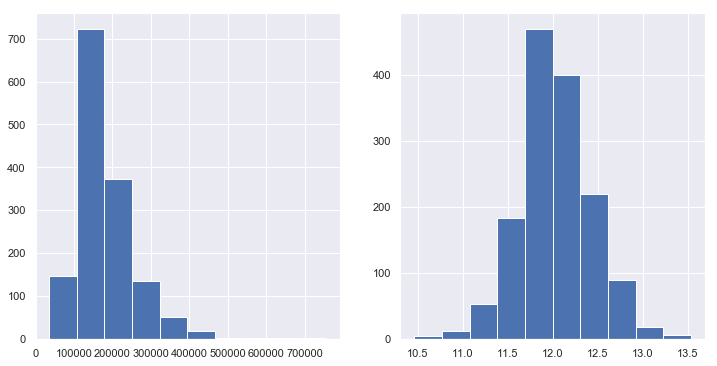

In [125]:
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
ax1.hist(train.SalePrice)
ax2.hist(np.log1p(train.SalePrice))

'''
从直方图中可以看出：

* 偏离正态分布
* 数据正偏
* 有峰值
'''
# 数据偏度和峰度度量：

print("Skewness: %f" % train['SalePrice'].skew())
print("Kurtosis: %f" % train['SalePrice'].kurt())

'''
低范围的值都比较相似并且在 0 附近分布。
高范围的值离 0 很远，并且七点几的值远在正常范围之外。
'''

In [126]:
'''
双变量分析
1.GrLivArea 和 SalePrice 双变量分析
'''

'\n双变量分析\n1.GrLivArea 和 SalePrice 双变量分析\n'

'\n从图中可以看出：\n\n1. 有两个离群的 GrLivArea 值很高的数据，我们可以推测出现这种情况的原因。\n    或许他们代表了农业地区，也就解释了低价。 这两个点很明显不能代表典型样例，所以我们将它们定义为异常值并删除。\n2. 图中顶部的两个点是七点几的观测值，他们虽然看起来像特殊情况，但是他们依然符合整体趋势，所以我们将其保留下来。\n'

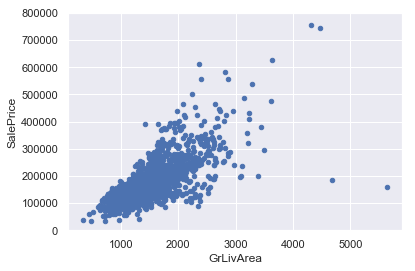

In [127]:
var = 'GrLivArea'
data = pd.concat([train['SalePrice'], train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

'''
从图中可以看出：

1. 有两个离群的 GrLivArea 值很高的数据，我们可以推测出现这种情况的原因。
    或许他们代表了农业地区，也就解释了低价。 这两个点很明显不能代表典型样例，所以我们将它们定义为异常值并删除。
2. 图中顶部的两个点是七点几的观测值，他们虽然看起来像特殊情况，但是他们依然符合整体趋势，所以我们将其保留下来。
'''

In [128]:
# 删除点
print(train.sort_values(by='GrLivArea', ascending = False)[:2])
tmp = train_test[train_test['SalePrice'].isnull().values==False]

train_test = train_test.drop(tmp[tmp['Id'] == 1299].index)
train_test = train_test.drop(tmp[tmp['Id'] == 524].index)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   
523    524          60       RL        130.0    40094   Pave   NaN      IR1   

     LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature  \
1298         Bnk    AllPub    ...          480     Gd   NaN         NaN   
523          Bnk    AllPub    ...            0    NaN   NaN         NaN   

     MiscVal MoSold YrSold  SaleType  SaleCondition  SalePrice  
1298       0      1   2008       New        Partial     160000  
523        0     10   2007       New        Partial     184750  

[2 rows x 81 columns]


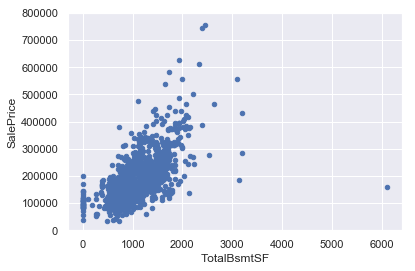

In [129]:
#2.TotalBsmtSF 和 SalePrice 双变量分析
var = 'TotalBsmtSF'
data = pd.concat([train['SalePrice'],train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice',ylim=(0,800000))

In [130]:
'''
核心部分
“房价” 到底是谁？

这个问题的答案，需要我们验证根据数据基础进行多元分析的假设。

我们已经进行了数据清洗，并且发现了 SalePrice 的很多信息，现在我们要更进一步理解 SalePrice 如何遵循统计假设，可以让我们应用多元技术。

应该测量 4 个假设量：

正态性
同方差性
线性
相关错误缺失
'''

'\n核心部分\n“房价” 到底是谁？\n\n这个问题的答案，需要我们验证根据数据基础进行多元分析的假设。\n\n我们已经进行了数据清洗，并且发现了 SalePrice 的很多信息，现在我们要更进一步理解 SalePrice 如何遵循统计假设，可以让我们应用多元技术。\n\n应该测量 4 个假设量：\n\n正态性\n同方差性\n线性\n相关错误缺失\n'

In [131]:
'''
正态性：
应主要关注以下两点：直方图 – 峰度和偏度。

正态概率图 – 数据分布应紧密跟随代表正态分布的对角线。
'''

'\n正态性：\n应主要关注以下两点：直方图 – 峰度和偏度。\n\n正态概率图 – 数据分布应紧密跟随代表正态分布的对角线。\n'

'\n可以看出，房价分布不是正态的，显示了峰值，正偏度，但是并不跟随对角线。\n可以用对数变换来解决这个问题\n'

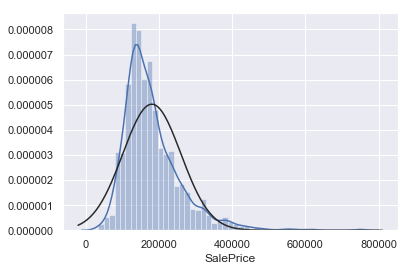

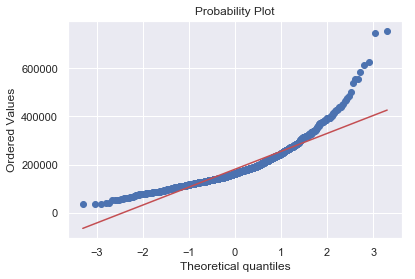

In [132]:
#1.SalePrice 绘制直方图和正态概率图：

sns.distplot(train['SalePrice'], fit=norm)
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

'''
可以看出，房价分布不是正态的，显示了峰值，正偏度，但是并不跟随对角线。
可以用对数变换来解决这个问题
'''

In [133]:
# 进行对数变换：
# 进行对数变换：
train_test['SalePrice'] = [i if i is None else np.log1p(i) for i in train_test['SalePrice']]

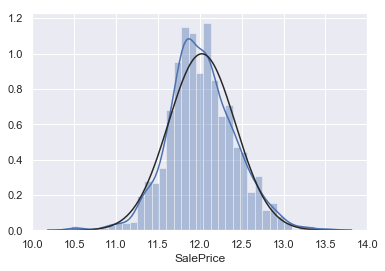

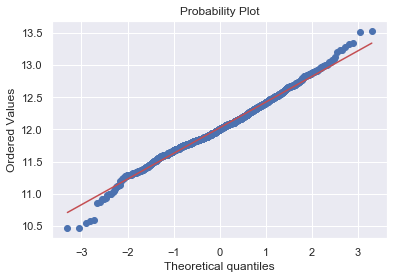

In [134]:
# 绘制变换后的直方图和正态概率图：
tmp = train_test[train_test['SalePrice'].isnull().values==False]

sns.distplot(tmp[tmp['SalePrice'] !=0]['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(tmp['SalePrice'], plot=plt)

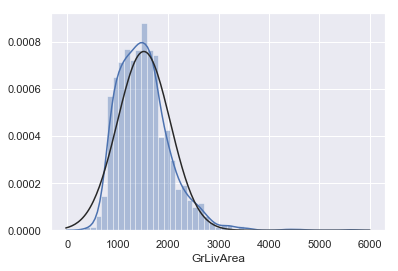

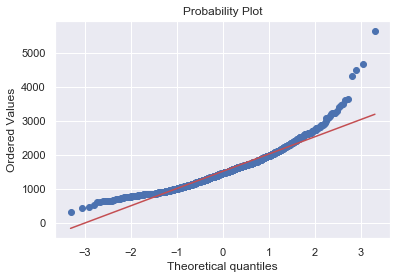

In [135]:
'''
2. GrLivArea

绘制直方图和正态概率曲线图：

'''

sns.distplot(train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['GrLivArea'], plot=plt)

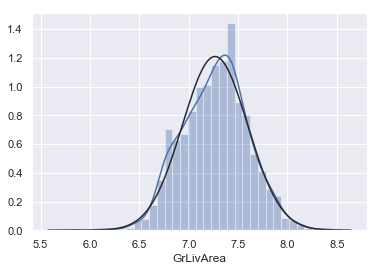

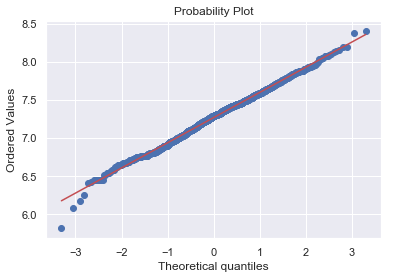

In [136]:
# 进行对数变换：
train_test['GrLivArea'] = [i if i is None else np.log1p(i) for i in train_test['GrLivArea']]

# 绘制变换后的直方图和正态概率图：
tmp = train_test[train_test['SalePrice'].isnull().values==False]
sns.distplot(tmp['GrLivArea'], fit=norm)
fig = plt.figure()
res = stats.probplot(tmp['GrLivArea'], plot=plt)

'\n从图中可以看出：\n* 显示出了偏度\n* 大量为 0(Y值) 的观察值（没有地下室的房屋）\n* 含 0(Y值) 的数据无法进行对数变换\n'

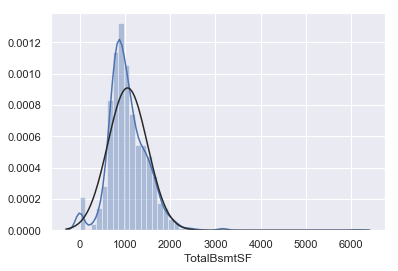

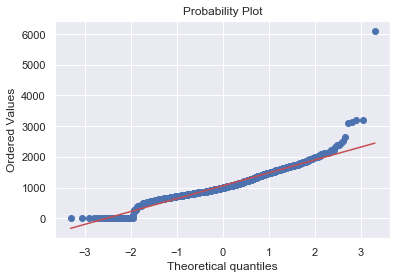

In [137]:
'''
3.TotalBsmtSF

绘制直方图和正态概率曲线图：
'''
sns.distplot(train['TotalBsmtSF'],fit=norm);
fig = plt.figure()
res = stats.probplot(train['TotalBsmtSF'],plot=plt)

'''
从图中可以看出：
* 显示出了偏度
* 大量为 0(Y值) 的观察值（没有地下室的房屋）
* 含 0(Y值) 的数据无法进行对数变换
'''

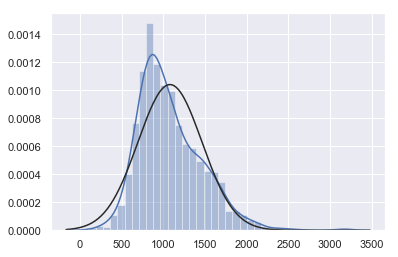

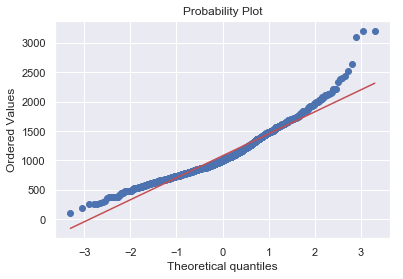

In [138]:
# 去掉为0的分布情况
tmp = train_test[train_test['SalePrice'].isnull().values==False]

tmp = np.array(tmp.loc[tmp['TotalBsmtSF']>0, ['TotalBsmtSF']])[:, 0]
sns.distplot(tmp, fit=norm)
fig = plt.figure()
res = stats.probplot(tmp, plot=plt)

In [139]:
# 我们建立了一个变量，可以得到有没有地下室的影响值（二值变量），我们选择忽略零值，只对非零值进行对数变换。
# 这样我们既可以变换数据，也不会损失有没有地下室的影响。

print(train.loc[train['TotalBsmtSF']==0, ['TotalBsmtSF']].count())
train.loc[train['TotalBsmtSF']==0,'TotalBsmtSF'] = 1
print(train.loc[train['TotalBsmtSF']==1, ['TotalBsmtSF']].count())

TotalBsmtSF    37
dtype: int64
TotalBsmtSF    37
dtype: int64


In [140]:
# 进行对数变换：
tmp = train_test[train_test['SalePrice'].isnull().values==False]

print(tmp['TotalBsmtSF'].head(10))
train_test['TotalBsmtSF']= np.log1p(train_test['TotalBsmtSF'])

tmp = train_test[train_test['SalePrice'].isnull().values==False]
print(tmp['TotalBsmtSF'].head(10))

0     856.0
1    1262.0
2     920.0
3     756.0
4    1145.0
5     796.0
6    1686.0
7    1107.0
8     952.0
9     991.0
Name: TotalBsmtSF, dtype: float64
0    6.753438
1    7.141245
2    6.825460
3    6.629363
4    7.044033
5    6.680855
6    7.430707
7    7.010312
8    6.859615
9    6.899723
Name: TotalBsmtSF, dtype: float64


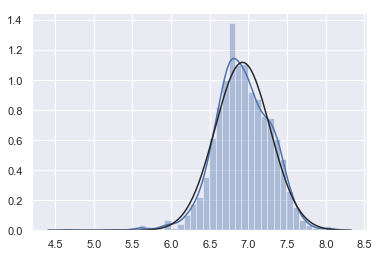

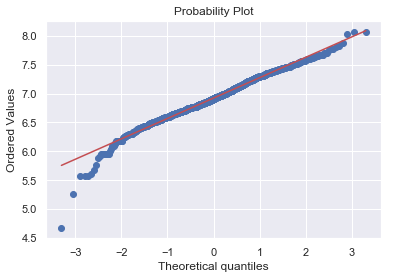

In [141]:
# 绘制变换后的直方图和正态概率图：
tmp = train_test[train_test['SalePrice'].isnull().values==False]

tmp = np.array(tmp.loc[tmp['TotalBsmtSF']>0, ['TotalBsmtSF']])[:, 0]
sns.distplot(tmp, fit=norm)
fig = plt.figure()
res = stats.probplot(tmp, plot=plt)

In [142]:
'''
同方差性：
最好的测量两个变量的同方差性的方法就是图像。
'''

'\n同方差性：\n最好的测量两个变量的同方差性的方法就是图像。\n'

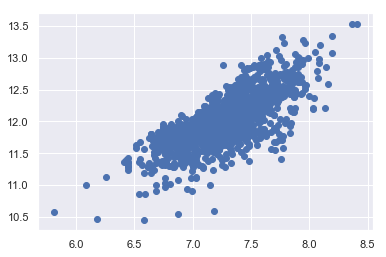

In [143]:
'''
1.SalePrice 和 GrLivArea 同方差性
绘制散点图：
'''

tmp = train_test[train_test['SalePrice'].isnull().values==False]

plt.scatter(tmp['GrLivArea'], tmp['SalePrice'])

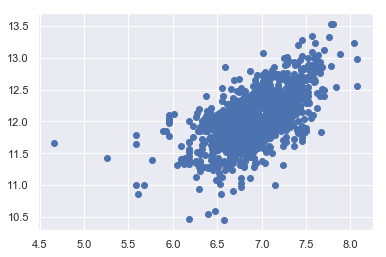

In [144]:
'''
2.SalePrice with TotalBsmtSF 同方差性
绘制散点图：
'''

tmp = train_test[train_test['SalePrice'].isnull().values==False]

plt.scatter(tmp[tmp['TotalBsmtSF']>0]['TotalBsmtSF'], tmp[tmp['TotalBsmtSF']>0]['SalePrice'])

# 可以看出 SalePrice 在整个 TotalBsmtSF 变量范围内显示出了同等级别的变化。


In [145]:
'''
三. 模型选择
'''

'\n三. 模型选择\n'

In [146]:
'''
1.数据标准化
'''

tmp = train_test[train_test['SalePrice'].isnull().values==False]
tmp_1 = train_test[train_test['SalePrice'].isnull().values==True]

x_train = tmp[['OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]
y_train = tmp[["SalePrice"]].values.ravel()
x_test = tmp_1[['OverallQual', 'GrLivArea','GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']]

# 简单测试，用中位数来替代
# print(x_test.GarageCars.mean(), x_test.GarageCars.median(), x_test.TotalBsmtSF.mean(), x_test.TotalBsmtSF.median())

x_test["GarageCars"].fillna(x_test.GarageCars.median(), inplace=True)
x_test["TotalBsmtSF"].fillna(x_test.TotalBsmtSF.median(), inplace=True)

c:\python36\install\lib\site-packages\pandas\core\generic.py:5430: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [172]:
'''
2.开始建模
可选单个模型模型有 线性回归（Ridge、Lasso）、树回归、GBDT、XGBoost、LightGBM 等.
也可以将多个模型组合起来,进行模型融合,比如voting,stacking等方法
好的特征决定模型上限,好的模型和参数可以无线逼近上限.
我测试了多种模型,模型结果最高的随机森林,最高有0.8.
bagging:
单个分类器的效果真的是很有限。 我们会倾向于把N多的分类器合在一起，做一个“综合分类器”以达到最好的效果。 我们从刚刚的试验中得知，Ridge(alpha=15)给了我们最好的结果。
'''


'\n2.开始建模\n可选单个模型模型有 线性回归（Ridge、Lasso）、树回归、GBDT、XGBoost、LightGBM 等.\n也可以将多个模型组合起来,进行模型融合,比如voting,stacking等方法\n好的特征决定模型上限,好的模型和参数可以无线逼近上限.\n我测试了多种模型,模型结果最高的随机森林,最高有0.8.\nbagging:\n单个分类器的效果真的是很有限。 我们会倾向于把N多的分类器合在一起，做一个“综合分类器”以达到最好的效果。 我们从刚刚的试验中得知，Ridge(alpha=15)给了我们最好的结果。\n'

In [173]:
from sklearn.linear_model import Lasso,LinearRegression,Ridge,ElasticNet,TheilSenRegressor,HuberRegressor,RANSACRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,ExtraTreesRegressor,GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import itertools

In [195]:
regs = [
    ['Lasso',Lasso()],
    ['LinearRegression',LinearRegression()],
    ['Ridge',Ridge()],
    ['ElasticNet',ElasticNet()],
    ['TheilSenRegressor',TheilSenRegressor()],
    ['RANSACRegressor',RANSACRegressor()],
    ['HuberRegressor',HuberRegressor()],
    ['SVR',SVR(kernel='linear')],
    ['DecisionTreeRegressor',DecisionTreeRegressor()],
    ['ExtraTreeRegressor',ExtraTreeRegressor()],
    ['AdaBoostRegressor',AdaBoostRegressor(n_estimators=150)],
    ['ExtraTreesRegressor',ExtraTreesRegressor(n_estimators=150)],
    ['GradientBoostingRegressor',GradientBoostingRegressor(n_estimators=150)],
    ['RandomForestRegressor',RandomForestRegressor(n_estimators=150)],
    ['XGBRegressor',XGBRegressor(n_estimators=150)],
]

In [196]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, tmp["SalePrice"], test_size=0.33, random_state=42)
Y_train

616     12.118339
614     11.231901
1303    12.354497
486     11.957618
562     11.589896
308     11.320566
461     11.951187
994     12.729324
1266    11.711785
1418    11.728045
1202    11.669938
1152    12.345839
1089    12.190964
766     12.188423
919     12.081082
352     11.461643
1290    12.103492
124     12.106258
178     13.126033
287     11.385103
1407    11.626263
1207    12.206078
294     12.025755
327     11.886219
941     12.273736
1126    12.066816
1120    11.681832
931     11.674202
236     12.130816
88      11.350418
          ...    
748     12.469978
252     12.061053
21      11.845110
1339    11.763692
459     11.608245
1185    11.560772
276     12.211065
956     11.728045
1216    11.626263
385     12.165256
806     11.816734
1439    12.190964
343     12.491255
770     11.812296
1334    11.736077
130     12.328295
872     11.661354
1124    12.007018
1398    11.835016
87      12.010672
330     11.686887
1239    12.490879
466     12.025755
121     11.512935
1045    11

In [197]:
preds = []
for reg_name,reg in regs:
    print(reg_name)
    reg.fit(X_train,Y_train)
    y_pred = reg.predict(X_test)
    if np.sum(y_pred<0) > 0:
        print('y_pred have',np.sum(y_pred<0),'negative values, we fill it with np.median(y_pred)')
        y_pred[y_pred<0] = np.median(y_pred)
    score = np.sqrt(mean_squared_error(np.log(Y_test),np.log(y_pred)))
    preds.append([reg_name,y_pred])
    

Lasso
LinearRegression
Ridge
ElasticNet
TheilSenRegressor
RANSACRegressor
HuberRegressor
SVR
DecisionTreeRegressor
ExtraTreeRegressor
AdaBoostRegressor
ExtraTreesRegressor
GradientBoostingRegressor
RandomForestRegressor
XGBRegressor


In [198]:
final_results = []
for comb_length in range(1,len(regs)+1):
    print('Model Amount :',comb_length)
    results = []
    for comb in itertools.combinations(preds,comb_length):
        pred_sum = 0
        model_name = []
        for reg_name,pred in comb:
            pred_sum += pred
            model_name.append(reg_name)
        pred_sum /= comb_length
        model_name = '+'.join(model_name)
        score = np.sqrt(mean_squared_error(np.log(Y_test),np.log(pred_sum)))
        results.append([model_name,score])
    results = sorted(results,key=lambda x:x[1])
    for model_name,score in results:
        print(model_name,score)
    print()
    final_results.append(results[0])

Model Amount : 1
XGBRegressor 0.013377592722444294
GradientBoostingRegressor 0.013607651859194297
RandomForestRegressor 0.013703662606224831
Ridge 0.014235682197228905
LinearRegression 0.014242093722642865
HuberRegressor 0.014321011214212039
ExtraTreesRegressor 0.01436705352434229
AdaBoostRegressor 0.016342997822316532
DecisionTreeRegressor 0.0183071175474075
ExtraTreeRegressor 0.018366102769131674
TheilSenRegressor 0.018753446852197115
RANSACRegressor 0.02091760651928349
ElasticNet 0.0270958319774058
Lasso 0.027143364777100883
SVR 0.089274455734976

Model Amount : 2
Ridge+RandomForestRegressor 0.01318935780458153
LinearRegression+RandomForestRegressor 0.013190385310004223
HuberRegressor+RandomForestRegressor 0.0131973417462866
Ridge+XGBRegressor 0.013257344704321796
LinearRegression+XGBRegressor 0.013259690301517729
RandomForestRegressor+XGBRegressor 0.01327343044137058
HuberRegressor+XGBRegressor 0.01327830172113812
Ridge+GradientBoostingRegressor 0.013290610818134329
LinearRegressio

SVR+AdaBoostRegressor+RandomForestRegressor 0.03151672975339338
SVR+AdaBoostRegressor+ExtraTreesRegressor 0.031540504152599486
SVR+AdaBoostRegressor+GradientBoostingRegressor 0.03168352612987255
SVR+ExtraTreesRegressor+RandomForestRegressor 0.031707081409562014
SVR+ExtraTreeRegressor+AdaBoostRegressor 0.03171283358034959
SVR+AdaBoostRegressor+XGBRegressor 0.031781374947959615
SVR+GradientBoostingRegressor+RandomForestRegressor 0.031806966333805996
SVR+ExtraTreesRegressor+GradientBoostingRegressor 0.03183281702195657
SVR+RandomForestRegressor+XGBRegressor 0.03189132275397579
SVR+ExtraTreesRegressor+XGBRegressor 0.03192784022567509
SVR+ExtraTreeRegressor+RandomForestRegressor 0.03192914230042601
HuberRegressor+SVR+AdaBoostRegressor 0.03199557111656427
Ridge+SVR+AdaBoostRegressor 0.031999716703818924
SVR+ExtraTreeRegressor+ExtraTreesRegressor 0.03201259078154007
LinearRegression+SVR+AdaBoostRegressor 0.03203183763456268
SVR+ExtraTreeRegressor+GradientBoostingRegressor 0.03204126177788352


LinearRegression+Ridge+TheilSenRegressor+RANSACRegressor 0.01559962036155066
Ridge+TheilSenRegressor+RANSACRegressor+HuberRegressor 0.015613397038271408
LinearRegression+TheilSenRegressor+RANSACRegressor+HuberRegressor 0.01561430707919599
ElasticNet+TheilSenRegressor+RANSACRegressor+AdaBoostRegressor 0.01561577159825864
Lasso+TheilSenRegressor+RANSACRegressor+AdaBoostRegressor 0.015616668049002457
Lasso+TheilSenRegressor+RANSACRegressor+ExtraTreeRegressor 0.015744620671064323
ElasticNet+TheilSenRegressor+RANSACRegressor+ExtraTreeRegressor 0.01574725841927766
Lasso+LinearRegression+TheilSenRegressor+RANSACRegressor 0.015947252100957564
LinearRegression+ElasticNet+TheilSenRegressor+RANSACRegressor 0.015955017961537907
Lasso+Ridge+TheilSenRegressor+RANSACRegressor 0.015955732991383673
Ridge+ElasticNet+TheilSenRegressor+RANSACRegressor 0.015963569720319492
Lasso+TheilSenRegressor+RANSACRegressor+HuberRegressor 0.016101465884741383
ElasticNet+TheilSenRegressor+RANSACRegressor+HuberRegressor

Ridge+HuberRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.01310009611257175
LinearRegression+HuberRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013101068279638159
LinearRegression+Ridge+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013106443588845537
Ridge+HuberRegressor+ExtraTreesRegressor+RandomForestRegressor+XGBRegressor 0.013132807170598143
LinearRegression+HuberRegressor+ExtraTreesRegressor+RandomForestRegressor+XGBRegressor 0.013133348494347354
HuberRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.0131395814546374
LinearRegression+Ridge+ExtraTreesRegressor+RandomForestRegressor+XGBRegressor 0.01314133381362589
LinearRegression+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013145851146442048
Ridge+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013145865393508276
Ridge+HuberRegressor+ExtraTreesReg

Lasso+ExtraTreeRegressor+AdaBoostRegressor+RandomForestRegressor+XGBRegressor 0.014159377716274511
ElasticNet+TheilSenRegressor+HuberRegressor+AdaBoostRegressor+GradientBoostingRegressor 0.01415974459674069
Lasso+TheilSenRegressor+HuberRegressor+AdaBoostRegressor+GradientBoostingRegressor 0.014160247793017451
Lasso+Ridge+ExtraTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor 0.014160530747564936
LinearRegression+TheilSenRegressor+RANSACRegressor+ExtraTreesRegressor+GradientBoostingRegressor 0.014161193560568216
ElasticNet+TheilSenRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor 0.01416141826125131
Ridge+TheilSenRegressor+RANSACRegressor+ExtraTreesRegressor+GradientBoostingRegressor 0.01416154005540075
Ridge+TheilSenRegressor+RANSACRegressor+GradientBoostingRegressor+XGBRegressor 0.014161729297495568
LinearRegression+TheilSenRegressor+RANSACRegressor+GradientBoostingRegressor+XGBRegressor 0.01416183376202897
Lasso+TheilSenRegressor+HuberRegressor+AdaBoostRegres

ElasticNet+TheilSenRegressor+SVR+AdaBoostRegressor+RandomForestRegressor 0.020528467875745793
ElasticNet+SVR+AdaBoostRegressor+ExtraTreesRegressor+XGBRegressor 0.02053542871524309
Lasso+SVR+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor 0.020543383671608077
Lasso+ElasticNet+SVR+AdaBoostRegressor+ExtraTreesRegressor 0.020544394425286317
ElasticNet+TheilSenRegressor+SVR+AdaBoostRegressor+ExtraTreesRegressor 0.02055577328611384
Lasso+SVR+ExtraTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor 0.020558548040149466
ElasticNet+SVR+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor 0.020570002030313533
ElasticNet+SVR+ExtraTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor 0.020587467944317497
Lasso+SVR+AdaBoostRegressor+GradientBoostingRegressor+XGBRegressor 0.020590929566384333
Lasso+TheilSenRegressor+SVR+AdaBoostRegressor+GradientBoostingRegressor 0.020597356989277445
Lasso+SVR+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor 0.02059843668336

LinearRegression+Ridge+RANSACRegressor+HuberRegressor+SVR 0.022952157960584516
TheilSenRegressor+RANSACRegressor+HuberRegressor+SVR+XGBRegressor 0.022958262075691585
Ridge+TheilSenRegressor+RANSACRegressor+SVR+XGBRegressor 0.022960735755257717
LinearRegression+TheilSenRegressor+RANSACRegressor+SVR+XGBRegressor 0.022976013341296862
TheilSenRegressor+RANSACRegressor+HuberRegressor+SVR+DecisionTreeRegressor 0.023043749306054472
Ridge+TheilSenRegressor+RANSACRegressor+SVR+DecisionTreeRegressor 0.023049075559145656
LinearRegression+TheilSenRegressor+RANSACRegressor+SVR+DecisionTreeRegressor 0.023064273214839327
Ridge+TheilSenRegressor+RANSACRegressor+HuberRegressor+SVR 0.023329072847391528
LinearRegression+TheilSenRegressor+RANSACRegressor+HuberRegressor+SVR 0.02334446187479173
LinearRegression+Ridge+TheilSenRegressor+RANSACRegressor+SVR 0.02334966556114272

Model Amount : 6
Ridge+HuberRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.0131044590923

Lasso+RANSACRegressor+ExtraTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor+XGBRegressor 0.01381280542257893
Lasso+LinearRegression+RANSACRegressor+AdaBoostRegressor+ExtraTreesRegressor+XGBRegressor 0.013812987002239535
Lasso+Ridge+TheilSenRegressor+DecisionTreeRegressor+AdaBoostRegressor+RandomForestRegressor 0.013813289779408535
Ridge+ElasticNet+DecisionTreeRegressor+AdaBoostRegressor+RandomForestRegressor+XGBRegressor 0.013813465637099186
Lasso+LinearRegression+RANSACRegressor+DecisionTreeRegressor+GradientBoostingRegressor+XGBRegressor 0.013813524060045304
ElasticNet+RANSACRegressor+DecisionTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor+XGBRegressor 0.013813836636848303
Lasso+LinearRegression+RANSACRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor 0.013813992677920446
Lasso+RANSACRegressor+HuberRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor 0.013814335115521159
Lasso+LinearRegression+HuberRegressor+AdaBoostR

LinearRegression+ElasticNet+HuberRegressor+DecisionTreeRegressor+ExtraTreeRegressor+RandomForestRegressor 0.01407837067921829
Lasso+TheilSenRegressor+RANSACRegressor+AdaBoostRegressor+ExtraTreesRegressor+RandomForestRegressor 0.014078581948536525
LinearRegression+ElasticNet+TheilSenRegressor+HuberRegressor+ExtraTreeRegressor+ExtraTreesRegressor 0.014079735885372131
Lasso+LinearRegression+TheilSenRegressor+HuberRegressor+ExtraTreeRegressor+ExtraTreesRegressor 0.014080042591636336
LinearRegression+Ridge+ElasticNet+HuberRegressor+ExtraTreeRegressor+RandomForestRegressor 0.014080304659902693
Lasso+RANSACRegressor+HuberRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor 0.014080316945890584
LinearRegression+Ridge+ElasticNet+RANSACRegressor+DecisionTreeRegressor+AdaBoostRegressor 0.01408142958439548
Ridge+ElasticNet+HuberRegressor+DecisionTreeRegressor+ExtraTreeRegressor+RandomForestRegressor 0.014082119397237977
LinearRegression+ElasticNet+RANSACRegressor+HuberRegressor+AdaBo

Lasso+TheilSenRegressor+SVR+DecisionTreeRegressor+ExtraTreesRegressor+RandomForestRegressor 0.01874249797298557
ElasticNet+SVR+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor 0.018742513437515464
Lasso+Ridge+TheilSenRegressor+SVR+AdaBoostRegressor+GradientBoostingRegressor 0.018742577166298152
Lasso+LinearRegression+TheilSenRegressor+SVR+ExtraTreesRegressor+RandomForestRegressor 0.018743319048736405
Lasso+TheilSenRegressor+SVR+DecisionTreeRegressor+GradientBoostingRegressor+RandomForestRegressor 0.01874554861894251
Lasso+LinearRegression+ElasticNet+SVR+AdaBoostRegressor+GradientBoostingRegressor 0.01874599973142531
Lasso+SVR+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor 0.018746019759436187
ElasticNet+HuberRegressor+SVR+ExtraTreeRegressor+AdaBoostRegressor+XGBRegressor 0.018746660478599138
Lasso+Ridge+SVR+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.01874711391205719
Lasso+SVR+DecisionTreeRegressor+

Ridge+TheilSenRegressor+SVR+AdaBoostRegressor+RandomForestRegressor+XGBRegressor 0.01951215056444607
Ridge+HuberRegressor+SVR+AdaBoostRegressor+ExtraTreesRegressor+XGBRegressor 0.019512573372180805
HuberRegressor+SVR+DecisionTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor+RandomForestRegressor 0.01951272371922047
TheilSenRegressor+SVR+DecisionTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+RandomForestRegressor 0.01951327893138903
RANSACRegressor+HuberRegressor+SVR+AdaBoostRegressor+ExtraTreesRegressor+RandomForestRegressor 0.019513521890709793
LinearRegression+HuberRegressor+SVR+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor 0.019514036144803185
Ridge+RANSACRegressor+SVR+AdaBoostRegressor+ExtraTreesRegressor+RandomForestRegressor 0.019516067498441217
LinearRegression+HuberRegressor+SVR+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor 0.019516165210761507
Lasso+Ridge+TheilSenRegressor+RANSACRegressor+SVR+ExtraTreeRegressor 0.01951661658189361


LinearRegression+Ridge+HuberRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.01313484728301218
Ridge+HuberRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013164566950731253
LinearRegression+HuberRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013165739285205752
LinearRegression+Ridge+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013166724022736012
Ridge+TheilSenRegressor+HuberRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013169306000698811
LinearRegression+TheilSenRegressor+HuberRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.01317001629290116
LinearRegression+Ridge+TheilSenRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013173747

Ridge+ElasticNet+RANSACRegressor+DecisionTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor 0.013684334640961181
LinearRegression+Ridge+ElasticNet+TheilSenRegressor+DecisionTreeRegressor+AdaBoostRegressor+XGBRegressor 0.013684979885319993
Lasso+LinearRegression+HuberRegressor+ExtraTreeRegressor+AdaBoostRegressor+RandomForestRegressor+XGBRegressor 0.013685321585630121
LinearRegression+ElasticNet+HuberRegressor+DecisionTreeRegressor+AdaBoostRegressor+RandomForestRegressor+XGBRegressor 0.013685363122484799
Lasso+Ridge+RANSACRegressor+HuberRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor 0.013685376350138593
Lasso+LinearRegression+TheilSenRegressor+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor 0.01368539680924841
LinearRegression+ElasticNet+RANSACRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+XGBRegressor 0.013685469854854181
LinearRegression+ElasticNet+RANSACRegressor+ExtraTr

ElasticNet+RANSACRegressor+HuberRegressor+DecisionTreeRegressor+ExtraTreeRegressor+ExtraTreesRegressor+XGBRegressor 0.01384876012817729
LinearRegression+TheilSenRegressor+RANSACRegressor+HuberRegressor+DecisionTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor 0.01384916230623117
Ridge+ElasticNet+RANSACRegressor+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor 0.013849770612195922
LinearRegression+Ridge+TheilSenRegressor+RANSACRegressor+DecisionTreeRegressor+AdaBoostRegressor+XGBRegressor 0.013849816873810827
LinearRegression+Ridge+TheilSenRegressor+RANSACRegressor+HuberRegressor+GradientBoostingRegressor+RandomForestRegressor 0.013850396801413518
LinearRegression+ElasticNet+RANSACRegressor+HuberRegressor+ExtraTreeRegressor+ExtraTreesRegressor+RandomForestRegressor 0.01385041796480591
LinearRegression+ElasticNet+TheilSenRegressor+HuberRegressor+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor 0.013850660131872144
ElasticNet+HuberRegressor+

Lasso+LinearRegression+Ridge+ElasticNet+DecisionTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor 0.01486471677386132
Lasso+Ridge+ElasticNet+HuberRegressor+AdaBoostRegressor+GradientBoostingRegressor+RandomForestRegressor 0.014864818840692011
Lasso+LinearRegression+ElasticNet+ExtraTreeRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor 0.014865648856367123
Lasso+LinearRegression+Ridge+ElasticNet+ExtraTreeRegressor+AdaBoostRegressor+XGBRegressor 0.014867410206980033
Lasso+Ridge+ElasticNet+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor 0.014867777460674896
Lasso+ElasticNet+HuberRegressor+ExtraTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor+XGBRegressor 0.014868270165581038
Lasso+ElasticNet+RANSACRegressor+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+RandomForestRegressor 0.014868729303705652
Lasso+LinearRegression+ElasticNet+HuberRegressor+DecisionTreeRegressor+GradientBoostingRegressor+XGBRegressor

Lasso+TheilSenRegressor+HuberRegressor+SVR+ExtraTreesRegressor+GradientBoostingRegressor+XGBRegressor 0.01744196907681821
Lasso+RANSACRegressor+SVR+DecisionTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor+XGBRegressor 0.01744209297626138
LinearRegression+ElasticNet+TheilSenRegressor+SVR+ExtraTreeRegressor+RandomForestRegressor+XGBRegressor 0.01744263193316669
LinearRegression+ElasticNet+SVR+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor 0.0174428372318077
Lasso+LinearRegression+SVR+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor 0.01744288996826896
LinearRegression+ElasticNet+TheilSenRegressor+SVR+ExtraTreesRegressor+GradientBoostingRegressor+XGBRegressor 0.01744335835579577
ElasticNet+HuberRegressor+SVR+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+RandomForestRegressor 0.01744360212245354
Ridge+ElasticNet+SVR+ExtraTreeRegressor+ExtraTreesRegressor+GradientBoostingRegressor+XGBRegressor 0.017443

ElasticNet+TheilSenRegressor+RANSACRegressor+SVR+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor 0.017715499442570327
Ridge+ElasticNet+TheilSenRegressor+HuberRegressor+SVR+DecisionTreeRegressor+RandomForestRegressor 0.01771589276072544
Lasso+Ridge+TheilSenRegressor+HuberRegressor+SVR+ExtraTreeRegressor+XGBRegressor 0.017716279563833464
Lasso+LinearRegression+TheilSenRegressor+HuberRegressor+SVR+GradientBoostingRegressor+XGBRegressor 0.017716696578108034
LinearRegression+ElasticNet+RANSACRegressor+HuberRegressor+SVR+ExtraTreesRegressor+RandomForestRegressor 0.017717126790330887
Lasso+LinearRegression+Ridge+RANSACRegressor+SVR+AdaBoostRegressor+XGBRegressor 0.017717491675837138
ElasticNet+TheilSenRegressor+RANSACRegressor+SVR+DecisionTreeRegressor+AdaBoostRegressor+XGBRegressor 0.017717600018494335
LinearRegression+Ridge+ElasticNet+TheilSenRegressor+SVR+ExtraTreeRegressor+XGBRegressor 0.017717631201397094
Lasso+LinearRegression+HuberRegressor+SVR+DecisionTreeRegressor+ExtraTre

LinearRegression+Ridge+SVR+DecisionTreeRegressor+ExtraTreeRegressor+GradientBoostingRegressor+RandomForestRegressor 0.018202632709143577
Ridge+HuberRegressor+SVR+DecisionTreeRegressor+ExtraTreeRegressor+RandomForestRegressor+XGBRegressor 0.018203321513277648
LinearRegression+RANSACRegressor+HuberRegressor+SVR+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor 0.01820385492086941
RANSACRegressor+HuberRegressor+SVR+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor 0.01820389707448844
Ridge+TheilSenRegressor+SVR+DecisionTreeRegressor+ExtraTreeRegressor+RandomForestRegressor+XGBRegressor 0.018204646230812607
LinearRegression+Ridge+TheilSenRegressor+SVR+ExtraTreeRegressor+RandomForestRegressor+XGBRegressor 0.01820474696565681
Ridge+HuberRegressor+SVR+DecisionTreeRegressor+ExtraTreeRegressor+ExtraTreesRegressor+RandomForestRegressor 0.018206263542101846
LinearRegression+Ridge+RANSACRegressor+SVR+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor 0.018

LinearRegression+Ridge+HuberRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013168580224803382
LinearRegression+Ridge+RANSACRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013188065641813287
Ridge+RANSACRegressor+HuberRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013190077596503334
LinearRegression+RANSACRegressor+HuberRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013190513044492886
Ridge+TheilSenRegressor+HuberRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013194837195950894
LinearRegression+Ridge+TheilSenRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013195646708659645
LinearRegression+TheilSenRegressor+Hub

Lasso+Ridge+HuberRegressor+DecisionTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor 0.013594167928227695
Lasso+Ridge+RANSACRegressor+HuberRegressor+DecisionTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor+XGBRegressor 0.013594243298748079
Lasso+LinearRegression+Ridge+TheilSenRegressor+HuberRegressor+DecisionTreeRegressor+RandomForestRegressor+XGBRegressor 0.013594337264326909
TheilSenRegressor+RANSACRegressor+HuberRegressor+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor+RandomForestRegressor 0.013594343577139085
Ridge+TheilSenRegressor+RANSACRegressor+HuberRegressor+DecisionTreeRegressor+ExtraTreeRegressor+GradientBoostingRegressor+XGBRegressor 0.013594443292899425
LinearRegression+TheilSenRegressor+RANSACRegressor+HuberRegressor+DecisionTreeRegressor+ExtraTreeRegressor+GradientBoostingRegressor+XGBRegressor 0.013594691663165398
LinearRegression+ElasticNet+RANSACRegressor+HuberRegressor+Ex

Lasso+TheilSenRegressor+RANSACRegressor+HuberRegressor+DecisionTreeRegressor+ExtraTreeRegressor+ExtraTreesRegressor+RandomForestRegressor 0.01386657181574752
LinearRegression+Ridge+ElasticNet+TheilSenRegressor+RANSACRegressor+DecisionTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor 0.013866836868828987
LinearRegression+ElasticNet+TheilSenRegressor+RANSACRegressor+HuberRegressor+DecisionTreeRegressor+AdaBoostRegressor+RandomForestRegressor 0.013867547651202902
LinearRegression+Ridge+ElasticNet+TheilSenRegressor+RANSACRegressor+DecisionTreeRegressor+ExtraTreeRegressor+RandomForestRegressor 0.01386821424060889
Lasso+LinearRegression+Ridge+TheilSenRegressor+RANSACRegressor+DecisionTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor 0.013868547323250236
Lasso+LinearRegression+TheilSenRegressor+RANSACRegressor+HuberRegressor+DecisionTreeRegressor+AdaBoostRegressor+RandomForestRegressor 0.013868827066948851
Ridge+ElasticNet+TheilSenRegressor+RANSACRegressor+HuberRegressor+DecisionTreeRegre

Lasso+LinearRegression+ElasticNet+TheilSenRegressor+RANSACRegressor+HuberRegressor+ExtraTreeRegressor+GradientBoostingRegressor 0.014792032416263014
Lasso+LinearRegression+ElasticNet+TheilSenRegressor+RANSACRegressor+HuberRegressor+ExtraTreeRegressor+XGBRegressor 0.014793921568831756
Lasso+Ridge+ElasticNet+TheilSenRegressor+RANSACRegressor+HuberRegressor+ExtraTreeRegressor+GradientBoostingRegressor 0.014796419967065823
Lasso+LinearRegression+Ridge+ElasticNet+RANSACRegressor+HuberRegressor+ExtraTreeRegressor+ExtraTreesRegressor 0.014796584606175476
Lasso+Ridge+ElasticNet+TheilSenRegressor+RANSACRegressor+HuberRegressor+ExtraTreeRegressor+XGBRegressor 0.014798289849128976
Lasso+LinearRegression+ElasticNet+TheilSenRegressor+RANSACRegressor+HuberRegressor+DecisionTreeRegressor+ExtraTreeRegressor 0.014819643950731211
Lasso+Ridge+ElasticNet+TheilSenRegressor+RANSACRegressor+HuberRegressor+DecisionTreeRegressor+ExtraTreeRegressor 0.014824011904340625
Lasso+LinearRegression+ElasticNet+TheilSen

ElasticNet+TheilSenRegressor+HuberRegressor+SVR+DecisionTreeRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.016546548308565043
Lasso+LinearRegression+HuberRegressor+SVR+ExtraTreeRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.016546562205300073
Lasso+LinearRegression+Ridge+ElasticNet+SVR+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor 0.01654721547654959
Ridge+ElasticNet+RANSACRegressor+SVR+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+RandomForestRegressor 0.016547374438542595
LinearRegression+ElasticNet+TheilSenRegressor+SVR+DecisionTreeRegressor+ExtraTreeRegressor+GradientBoostingRegressor+RandomForestRegressor 0.016547437679413482
Ridge+ElasticNet+HuberRegressor+SVR+DecisionTreeRegressor+AdaBoostRegressor+RandomForestRegressor+XGBRegressor 0.016547468583439577
Ridge+ElasticNet+TheilSenRegressor+HuberRegressor+SVR+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor 0.016547594007075183
Lasso+RANS

Lasso+LinearRegression+TheilSenRegressor+HuberRegressor+SVR+DecisionTreeRegressor+ExtraTreeRegressor+GradientBoostingRegressor 0.016723399299044
Lasso+Ridge+ElasticNet+TheilSenRegressor+HuberRegressor+SVR+ExtraTreeRegressor+ExtraTreesRegressor 0.01672455377092639
LinearRegression+Ridge+ElasticNet+TheilSenRegressor+HuberRegressor+SVR+AdaBoostRegressor+RandomForestRegressor 0.016724636985085122
Lasso+LinearRegression+RANSACRegressor+HuberRegressor+SVR+ExtraTreeRegressor+ExtraTreesRegressor+GradientBoostingRegressor 0.01672474752739081
Lasso+LinearRegression+Ridge+ElasticNet+RANSACRegressor+SVR+ExtraTreeRegressor+AdaBoostRegressor 0.01672500638018985
Lasso+LinearRegression+Ridge+RANSACRegressor+SVR+DecisionTreeRegressor+AdaBoostRegressor+XGBRegressor 0.01672502477777227
Lasso+LinearRegression+TheilSenRegressor+HuberRegressor+SVR+DecisionTreeRegressor+GradientBoostingRegressor+XGBRegressor 0.01672561732235364
Ridge+ElasticNet+TheilSenRegressor+RANSACRegressor+SVR+ExtraTreesRegressor+Random

LinearRegression+Ridge+RANSACRegressor+HuberRegressor+SVR+AdaBoostRegressor+GradientBoostingRegressor+RandomForestRegressor 0.01719262212034675
LinearRegression+Ridge+TheilSenRegressor+HuberRegressor+SVR+ExtraTreeRegressor+ExtraTreesRegressor+RandomForestRegressor 0.017192741772457408
Ridge+TheilSenRegressor+RANSACRegressor+SVR+ExtraTreeRegressor+AdaBoostRegressor+RandomForestRegressor+XGBRegressor 0.01719320801353816
LinearRegression+Ridge+RANSACRegressor+HuberRegressor+SVR+ExtraTreeRegressor+AdaBoostRegressor+RandomForestRegressor 0.0171934206011745
TheilSenRegressor+RANSACRegressor+HuberRegressor+SVR+ExtraTreeRegressor+AdaBoostRegressor+RandomForestRegressor+XGBRegressor 0.017193587607860595
LinearRegression+Ridge+RANSACRegressor+SVR+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor 0.017196277787051576
LinearRegression+Ridge+TheilSenRegressor+HuberRegressor+SVR+ExtraTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor 0.017197017106322474
TheilSenR

LinearRegression+Ridge+HuberRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013198103958830776
LinearRegression+Ridge+RANSACRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013203351842072317
Ridge+RANSACRegressor+HuberRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013204975910216195
LinearRegression+RANSACRegressor+HuberRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.01320527322706206
LinearRegression+Ridge+RANSACRegressor+HuberRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013206584161834574
Ridge+TheilSenRegressor+HuberRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoost

LinearRegression+Ridge+ElasticNet+TheilSenRegressor+RANSACRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+RandomForestRegressor 0.013662842894433392
LinearRegression+Ridge+ElasticNet+RANSACRegressor+HuberRegressor+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor 0.013663133936854088
Lasso+LinearRegression+TheilSenRegressor+RANSACRegressor+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+RandomForestRegressor 0.013663167701449281
Lasso+TheilSenRegressor+RANSACRegressor+HuberRegressor+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+XGBRegressor 0.013663187385697988
LinearRegression+ElasticNet+TheilSenRegressor+RANSACRegressor+HuberRegressor+ExtraTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor+XGBRegressor 0.01366343580733847
Lasso+Ridge+TheilSenRegressor+RANSACRegressor+HuberRegressor+ExtraTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor+XGBRegressor 0.01366402

Lasso+Ridge+TheilSenRegressor+SVR+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+RandomForestRegressor+XGBRegressor 0.015631909274778526
LinearRegression+ElasticNet+TheilSenRegressor+SVR+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor 0.015632578242000282
Lasso+Ridge+ElasticNet+TheilSenRegressor+SVR+AdaBoostRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.015632930120423882
Lasso+RANSACRegressor+SVR+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.015633126684372917
Lasso+LinearRegression+ElasticNet+TheilSenRegressor+SVR+ExtraTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor+RandomForestRegressor 0.015633399774912633
Lasso+LinearRegression+ElasticNet+TheilSenRegressor+SVR+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+RandomForestRegressor 0.015634633508234054
Lasso+ElasticNet+TheilSenRegressor+SVR+DecisionTr

Ridge+ElasticNet+TheilSenRegressor+RANSACRegressor+SVR+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+RandomForestRegressor 0.01589027849714456
Lasso+LinearRegression+Ridge+ElasticNet+SVR+ExtraTreeRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.015890343984701634
Lasso+LinearRegression+Ridge+TheilSenRegressor+SVR+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+XGBRegressor 0.01589101442603173
Lasso+LinearRegression+Ridge+ElasticNet+TheilSenRegressor+SVR+ExtraTreeRegressor+RandomForestRegressor+XGBRegressor 0.01589102210654652
Lasso+Ridge+ElasticNet+SVR+DecisionTreeRegressor+ExtraTreeRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor 0.015891438977788136
Lasso+LinearRegression+Ridge+ElasticNet+TheilSenRegressor+SVR+ExtraTreesRegressor+GradientBoostingRegressor+XGBRegressor 0.015891504610096033
Lasso+LinearRegression+TheilSenRegressor+HuberRegressor+SVR+DecisionTreeRegressor+ExtraTreesRegressor+GradientBoostingRegre

Lasso+LinearRegression+Ridge+ElasticNet+TheilSenRegressor+HuberRegressor+SVR+AdaBoostRegressor+GradientBoostingRegressor 0.016071474009048684
Lasso+LinearRegression+TheilSenRegressor+RANSACRegressor+SVR+DecisionTreeRegressor+ExtraTreeRegressor+ExtraTreesRegressor+RandomForestRegressor 0.016071592180766776
Lasso+LinearRegression+Ridge+ElasticNet+HuberRegressor+SVR+ExtraTreesRegressor+GradientBoostingRegressor+XGBRegressor 0.01607202756775609
Ridge+ElasticNet+TheilSenRegressor+RANSACRegressor+SVR+DecisionTreeRegressor+ExtraTreesRegressor+GradientBoostingRegressor+XGBRegressor 0.01607272857326558
Lasso+LinearRegression+Ridge+TheilSenRegressor+HuberRegressor+SVR+DecisionTreeRegressor+ExtraTreesRegressor+GradientBoostingRegressor 0.01607288769971946
Lasso+LinearRegression+Ridge+TheilSenRegressor+RANSACRegressor+SVR+AdaBoostRegressor+RandomForestRegressor+XGBRegressor 0.0160729229002423
LinearRegression+Ridge+ElasticNet+HuberRegressor+SVR+DecisionTreeRegressor+ExtraTreeRegressor+ExtraTreesRe

LinearRegression+Ridge+RANSACRegressor+HuberRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013200078799363758
LinearRegression+Ridge+TheilSenRegressor+HuberRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.01320980827994698
LinearRegression+Ridge+RANSACRegressor+HuberRegressor+DecisionTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013230091402793642
LinearRegression+Ridge+TheilSenRegressor+HuberRegressor+DecisionTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013240384039654834
LinearRegression+Ridge+RANSACRegressor+HuberRegressor+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013247725474669752
LinearRegression+Ridge+R

Lasso+Ridge+ElasticNet+RANSACRegressor+SVR+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.015191971559893587
Lasso+TheilSenRegressor+SVR+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.015192182608111634
Lasso+LinearRegression+RANSACRegressor+SVR+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.015193954212807016
Lasso+LinearRegression+ElasticNet+RANSACRegressor+SVR+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.01519495915907179
Lasso+ElasticNet+TheilSenRegressor+RANSACRegressor+SVR+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor 0.01519609096796404
Lasso+Ridge+ElasticNet+TheilSenRegressor+SVR+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+GradientB

Lasso+Ridge+ElasticNet+RANSACRegressor+HuberRegressor+SVR+DecisionTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+XGBRegressor 0.015446279927015437
Lasso+LinearRegression+ElasticNet+RANSACRegressor+HuberRegressor+SVR+ExtraTreeRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor 0.015446297552542811
Lasso+LinearRegression+Ridge+TheilSenRegressor+RANSACRegressor+SVR+AdaBoostRegressor+ExtraTreesRegressor+RandomForestRegressor+XGBRegressor 0.015446631832008692
Lasso+ElasticNet+TheilSenRegressor+RANSACRegressor+HuberRegressor+SVR+ExtraTreeRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.015448300109840631
Lasso+LinearRegression+TheilSenRegressor+RANSACRegressor+SVR+DecisionTreeRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.015448442997570899
Lasso+ElasticNet+TheilSenRegressor+RANSACRegressor+HuberRegressor+SVR+ExtraTreeRegressor+ExtraTreesRegressor+RandomForestRegressor+XGBRegressor 0.01544845

LinearRegression+Ridge+RANSACRegressor+HuberRegressor+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013234777123156197
LinearRegression+Ridge+TheilSenRegressor+HuberRegressor+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013245131577372763
LinearRegression+Ridge+TheilSenRegressor+RANSACRegressor+HuberRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013325584647243718
LinearRegression+Ridge+ElasticNet+TheilSenRegressor+HuberRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013326618084086831
Lasso+LinearRegression+Ridge+TheilSenRegressor+HuberRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+Random

LinearRegression+ElasticNet+TheilSenRegressor+RANSACRegressor+HuberRegressor+SVR+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor+RandomForestRegressor 0.015091422353881606
Lasso+LinearRegression+Ridge+ElasticNet+TheilSenRegressor+RANSACRegressor+SVR+ExtraTreeRegressor+ExtraTreesRegressor+RandomForestRegressor+XGBRegressor 0.01509143671733872
Lasso+Ridge+TheilSenRegressor+RANSACRegressor+HuberRegressor+SVR+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+RandomForestRegressor 0.015091807339435392
Ridge+ElasticNet+TheilSenRegressor+RANSACRegressor+HuberRegressor+SVR+DecisionTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.015091810360263141
Lasso+LinearRegression+Ridge+ElasticNet+TheilSenRegressor+RANSACRegressor+SVR+ExtraTreeRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.01509188975339114
Lasso+Ridge+TheilSenRegressor+RANSACRegressor+HuberRegressor+S

Lasso+LinearRegression+ElasticNet+TheilSenRegressor+RANSACRegressor+HuberRegressor+SVR+DecisionTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.014739692528010608
Lasso+Ridge+ElasticNet+TheilSenRegressor+RANSACRegressor+HuberRegressor+SVR+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor+RandomForestRegressor 0.014739767547452445
Lasso+LinearRegression+Ridge+ElasticNet+RANSACRegressor+HuberRegressor+SVR+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+XGBRegressor 0.014740204632502455
LinearRegression+Ridge+ElasticNet+TheilSenRegressor+RANSACRegressor+SVR+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+RandomForestRegressor+XGBRegressor 0.01474143786981907
Lasso+LinearRegression+ElasticNet+TheilSenRegressor+RANSACRegressor+HuberRegressor+SVR+DecisionTreeRegressor+ExtraTreeRegressor+AdaBoostRegressor+GradientBoostingRegressor+RandomForestRegre

In [200]:
final_results = sorted(final_results,key=lambda x:x[1])
for model_name,score in final_results:
    print(model_name,score)

Ridge+RandomForestRegressor+XGBRegressor 0.013057049417546153
HuberRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013085508099179634
Ridge+HuberRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.01310009611257175
Ridge+HuberRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013104459092326841
LinearRegression+Ridge+HuberRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.01313484728301218
LinearRegression+Ridge+HuberRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013168580224803382
Ridge+RandomForestRegressor 0.01318935780458153
LinearRegression+Ridge+HuberRegressor+ExtraTreeRegressor+AdaBoostRegressor+ExtraTreesRegressor+GradientBoostingRegressor+RandomForestRegressor+XGBRegressor 0.013198103958830776
LinearRegression+Ridge+RANSACRegressor+HuberRegressor+ExtraTreeRegressor+AdaBoostRegressor+Ext

In [201]:
[b for b in zip(itertools.count(),[a[0] for a in regs])]

[(0, 'Lasso'),
 (1, 'LinearRegression'),
 (2, 'Ridge'),
 (3, 'ElasticNet'),
 (4, 'TheilSenRegressor'),
 (5, 'RANSACRegressor'),
 (6, 'HuberRegressor'),
 (7, 'SVR'),
 (8, 'DecisionTreeRegressor'),
 (9, 'ExtraTreeRegressor'),
 (10, 'AdaBoostRegressor'),
 (11, 'ExtraTreesRegressor'),
 (12, 'GradientBoostingRegressor'),
 (13, 'RandomForestRegressor'),
 (14, 'XGBRegressor')]

In [206]:
pred = np.mean(list(map(lambda x:regs[x][1].predict(x_test),[0,12,14])),axis=0)
pred=np.exp(pred)

In [207]:
sub = pd.DataFrame({'Id':id,'SalePrice':pred})
sub.to_csv('submission_Universe_fillNaN3.csv',index=None)